<a href="https://colab.research.google.com/github/YrysSuiunbaeva/Breast_Cancer_Predictor_KG/blob/main/Breast_Cancer_Predictor_Kyrgyzstan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

import optuna

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Загрузка данных

In [ ]:
data = pd.read_csv('/content/breast_cancer_predictor_kyrgyzstan.csv')
data

,№,Дата регистрации,Дата рождение(возраст),Возраст(Лет),Область,Место жительство,Наследственность,BIRADS правой груди,BIRADS левой груди,BIRADS(Общее),...,Число родов методом кесарева сечения,Аборты,Первые роды в возрасте,Общее число случаев рождения живого ребенка,Общее число случаев рождения мертвого ребенка,Менструальные циклы,День цикла,Маммографическое обследование,Осмотр у гинеколога,Дата создания
0,3,14-06-2023 04:36,09-09-1963,59,г. Бишкек,Юдахина 107-7,Нет,2,2,2,...,NaN,Да,27.0,2.0,NaN,Менопауза,Нет,Да,Нет,2023-06-14 04:38:00
1,4,14-06-2023 04:11,09-03-1977,46,г. Бишкек,Актан 85-2,"Родство (двоюродная сестра, тётя)",3,3,3,...,1.0,Да,25.0,3.0,NaN,День цикла,12,Да,Нет,2023-06-14 04:18:00
2,5,14-06-2023 03:39,09-09-1973,49,Чуйская область,Сокулукский р-н. ул. Северная 113,"Близкое родство (мама, родная сестра, бабушка ...",4C,3,4C,...,NaN,Да,20.0,1.0,1.0,Нарушение менструального цикла,Нет,Да,Нет,2023-06-14 03:41:00
3,6,14-06-2023 03:26,06-04-1969,54,г. Бишкек,Токтоаналыы 16.7,"Близкое родство (мама, родная сестра, бабушка ...",3,3,3,...,NaN,Нет,26.0,1.0,NaN,Менопауза,Нет,Да,Нет,2023-06-14 03:27:00
4,7,13-06-2023 08:22,25-11-1987,35,г. Бишкек,Циолковского54,Нет,3,3,3,...,1.0,Да,21.0,3.0,NaN,День цикла,16,Да,Нет,2023-06-13 08:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,4633,26-09-2020 09:33,24-12-1974,48,г. Бишкек,г.Бишкек. Боконбаева 7-65,Нет,3,1,3,...,NaN,Нет,24.0,3.0,NaN,Менопауза,Нет,Да,Нет,2020-09-26 08:34:00
4595,4634,26-09-2020 08:36,18-09-1973,49,г. Бишкек,"г.Бишкек, Фурманова 8-6",Нет,2,1,2,...,NaN,Да,20.0,2.0,NaN,Менопауза,Нет,Да,Нет,2020-09-26 06:35:00
4596,4635,26-09-2020 08:06,02-07-1968,54,г. Бишкек,"г.Бишкек, Арча-Бешик, Куюкова 121 Б",Нет,1,1,1,...,NaN,Да,22.0,5.0,NaN,Менопауза,Нет,Да,Нет,2020-09-26 08:06:00
4597,4636,26-09-2020 05:50,11-09-1957,65,г. Бишкек,"г.Бишкек, Токтогула 93/28",Нет,1,1,1,...,NaN,Да,21.0,2.0,2.0,Менопауза,Нет,Да,Нет,2020-09-26 05:51:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   №                                              4599 non-null   int64  
 1   Дата регистрации                               4599 non-null   object 
 2   Дата рождение(возраст)                         4599 non-null   object 
 3   Возраст(Лет)                                   4599 non-null   int64  
 4   Область                                        4599 non-null   object 
 5   Место жительство                               4599 non-null   object 
 6   Наследственность                               4599 non-null   object 
 7   BIRADS правой груди                            4599 non-null   object 
 8   BIRADS левой груди                             4599 non-null   object 
 9   BIRADS(Общее)                                  4599 

In [ ]:
data.columns

Index(['№', 'Дата регистрации', 'Дата рождение(возраст)', 'Возраст(Лет)',
       'Область', 'Место жительство', 'Наследственность',
       'BIRADS правой груди', 'BIRADS левой груди', 'BIRADS(Общее)',
       'Результаты маммографии', 'Рекомендации', 'Обследования', 'Жалобы',
       'Семейное положение', 'Общее число беременностей',
       'Число естественных родов', 'Число родов методом кесарева сечения',
       'Аборты', 'Первые роды в возрасте',
       'Общее число случаев рождения живого ребенка',
       'Общее число случаев рождения мертвого ребенка', 'Менструальные циклы',
       'День цикла', 'Маммографическое обследование', 'Осмотр у гинеколога',
       'Дата создания'],
      dtype='object')

# Чистка данных

Избавляемся от ненужных колонок:


In [ ]:
data = data.drop(columns=['Дата регистрации', 'Дата создания', 'Осмотр у гинеколога', 'Обследования', 'День цикла'])

**Возраст(Лет)**

Смотрим, где значения в столбце 'Возраст(Лет)' больше 100:

In [ ]:
data[data['Возраст(Лет)'] > 100]

,№,Дата рождение(возраст),Возраст(Лет),Область,Место жительство,Наследственность,BIRADS правой груди,BIRADS левой груди,BIRADS(Общее),Результаты маммографии,...,Семейное положение,Общее число беременностей,Число естественных родов,Число родов методом кесарева сечения,Аборты,Первые роды в возрасте,Общее число случаев рождения живого ребенка,Общее число случаев рождения мертвого ребенка,Менструальные циклы,Маммографическое обследование
148,153,11-08-0083,1939,г. Бишкек,Бишкек,Нет,2,2,2,R картина может соответствовать фиброзно-кисто...,...,Замужем/Живет с партнером,6.0,4.0,NaN,Да,23.0,4.0,NaN,День цикла,Да
472,484,13-09-1376,646,г. Бишкек,3-23-36,Нет,2,2,2,R картина может соответствовать инволютивным и...,...,Замужем/Живет с партнером,6.0,6.0,NaN,Нет,27.0,6.0,NaN,День цикла,Да
497,510,15-03-1071,952,г. Бишкек,г.Бишкек Тирасполь к.90,"Близкое родство (мама, родная сестра, бабушка ...",2,2,2,R картина может соответствовать фиброзной маст...,...,Замужем/Живет с партнером,3.0,1.0,NaN,Да,22.0,1.0,NaN,Нарушение менструального цикла,Да
1963,1984,15-06-0065,1958,г. Бишкек,Бишкек,Нет,2,2,2,R картина может соответствовать фиброзно-кисто...,...,Замужем/Живет с партнером,5.0,2.0,NaN,Нет,20.0,2.0,NaN,Менопауза,Да
2127,2149,13-10-0970,1052,г. Бишкек,Бишкек,Нет,3,2,3,R картина может соответствовать фиброзной маст...,...,Замужем/Живет с партнером,7.0,3.0,NaN,Да,19.0,3.0,NaN,Менопауза,Да
2136,2158,20-06-1796,226,г. Бишкек,г. Бишкек,Нет,3,2,3,R картина может соответствовать фиброзно-кисто...,...,Разведена,3.0,1.0,NaN,Да,19.0,1.0,1.0,День цикла,Да


Корректируем значения в столбце 'Возраст(Лет)':

In [ ]:
data['Возраст(Лет)'] = data['Возраст(Лет)'] % 100
data = data.drop(data[data['Возраст(Лет)'] <= 2].index)

**BIRADS**

Делим BIRADS(Общее) на две категории: malignant и benign:

c 1 по 3 — изменений нет, либо новообразования доброкачественные (benign);

c 4 по 5 — существуют признаки злокачественности патологии (malignant).


In [ ]:
data['BIRADS(Общее)'] = data['BIRADS(Общее)'].astype('str')
benign = ['1', '2', '3']
malignant = ['4C', '4', '4A', '5', '4B']
data['BIRADS(Общее)'] = ['malignant' if x in malignant else 'benign' for x in data['BIRADS(Общее)']]

Создаем новую колонку 'BIRADS_encoded' и преобразуем значения в колонке 'BIRADS(Общее)' в бинарные значения:

In [ ]:
data['BIRADS_encoded'] = [1 if x == 'malignant' else 0 for x in data['BIRADS(Общее)']]
data['BIRADS_encoded'].value_counts()

0    4398
1     200
Name: BIRADS_encoded, dtype: int64

**Наследственность**

Преобразуем значения в колонке 'Наследственность' в бинарные значения:

In [ ]:
data['Наследственность'] = data['Наследственность'].replace('Нет', 0)
data['Наследственность'] = data['Наследственность'].replace('Родство (двоюродная сестра, тётя)', 1)
data['Наследственность'] = data['Наследственность'].replace('Близкое родство (мама, родная сестра, бабушка по материнской линии)', 1)

In [ ]:
data['Наследственность'].value_counts()

0    4454
1     144
Name: Наследственность, dtype: int64

**Аборты**

Преобразуем колонку 'Аборты' в бинарные значения: 0 - нет, 1 - да:

In [ ]:
data['Аборты'] = [1 if x == 'Да' else 0 for x in data['Аборты']]
data['Аборты'].value_counts()

1    3132
0    1466
Name: Аборты, dtype: int64

**Менструальные циклы**

In [ ]:
data['Менструальные циклы'].value_counts()

Менопауза                         3075
День цикла                        1291
Нарушение менструального цикла     232
Name: Менструальные циклы, dtype: int64

Используем функцию get_dummies из библиотеки pandas, чтобы преобразовать столбец 'Менструальные циклы':

In [ ]:
encoded_df = pd.get_dummies(data['Менструальные циклы'])
data = pd.concat([data, encoded_df], axis=1)

In [ ]:
data.columns

Index(['№', 'Дата рождение(возраст)', 'Возраст(Лет)', 'Область',
       'Место жительство', 'Наследственность', 'BIRADS правой груди',
       'BIRADS левой груди', 'BIRADS(Общее)', 'Результаты маммографии',
       'Рекомендации', 'Жалобы', 'Семейное положение',
       'Общее число беременностей', 'Число естественных родов',
       'Число родов методом кесарева сечения', 'Аборты',
       'Первые роды в возрасте', 'Общее число случаев рождения живого ребенка',
       'Общее число случаев рождения мертвого ребенка', 'Менструальные циклы',
       'Маммографическое обследование', 'BIRADS_encoded', 'День цикла',
       'Менопауза', 'Нарушение менструального цикла'],
      dtype='object')

**Результаты маммографии**

Преобразование категориального признака 'Результаты маммографии' на основе целевого признака 'BIRADS_encoded', используя Target Encoding:



In [ ]:
encoder = ce.TargetEncoder(cols=['Результаты маммографии'])

encoded_df = encoder.fit_transform(data['Результаты маммографии'], data['BIRADS_encoded'])
encoded_df = encoded_df.rename(columns={'Результаты маммографии': 'Результаты маммографии_encoded'})
data = pd.concat([data, encoded_df], axis=1)

In [ ]:
data['Результаты маммографии_encoded'].value_counts()

3.783782e-02    1202
0.000000e+00     419
3.732705e-02     262
6.658953e-12     246
3.677837e-02     183
4.894961e-09     180
1.679463e-01     151
3.619045e-02     140
3.607547e-07     137
3.920530e-04     134
1.781501e-05      98
3.263419e-02      81
3.489273e-02      78
3.418160e-02      77
3.556218e-02      75
2.160418e-04      73
3.342866e-02      64
5.822931e-04      63
6.426286e-04      62
9.517734e-04      58
2.906428e-02      52
1.851055e-02      46
3.007326e-03      46
2.707522e-02      45
3.092429e-02      44
3.963591e-03      43
2.174859e-02      40
3.179898e-02      40
2.875299e-02      38
7.306725e-03      36
7.934995e-03      35
2.604122e-02      32
1.169819e-02      30
1.257288e-02      29
1.348523e-02      28
2.808422e-02      28
1.745595e-02      24
3.001194e-02      24
2.283511e-02      19
2.391622e-02      18
2.498663e-02      17
1.082526e-01      14
5.458830e-02      13
8.826679e-02      12
1.791781e-01      12
5.720161e-02      11
1.450175e-01      10
7.818585e-02 

# Визуализация

**Возраст**

1. Распределим данные по возрастным группам: младше 45 лет, от 45 лет до 65 лет, и старше 65 лет:

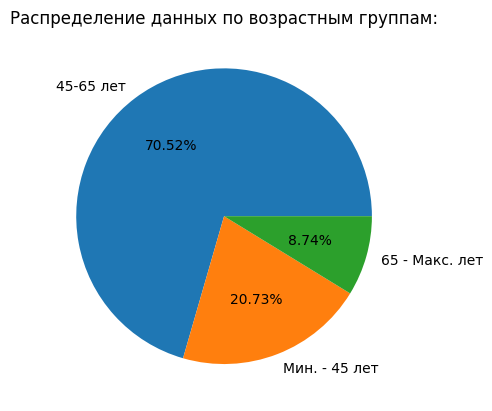

In [ ]:
bins = [data['Возраст(Лет)'].min(), 45, 65, data['Возраст(Лет)'].max()]
labels = ['Мин. - 45 лет', '45-65 лет', '65 - Макс. лет']

age_groups = pd.cut(data['Возраст(Лет)'], bins=bins, labels=labels)

count_by_age_group = age_groups.value_counts()

plt.pie(count_by_age_group.values, labels=count_by_age_group.index, autopct='%1.2f%%')
plt.title('Распределение данных по возрастным группам:')
plt.show()

Благодаря этой визуализации можно быстро определить примерное распределение данных по возрасту. Наибольшая доля данных приходится на группу "45-65 лет", что может указывать на средний возраст наблюдаемой выборки. Группы "Мин. - 45 лет" и "65 - Макс. лет" составляют оставшуюся долю данных.

2. Распределим данные возрастов с использованием гистограммы с учетом разделения данных по ширине:

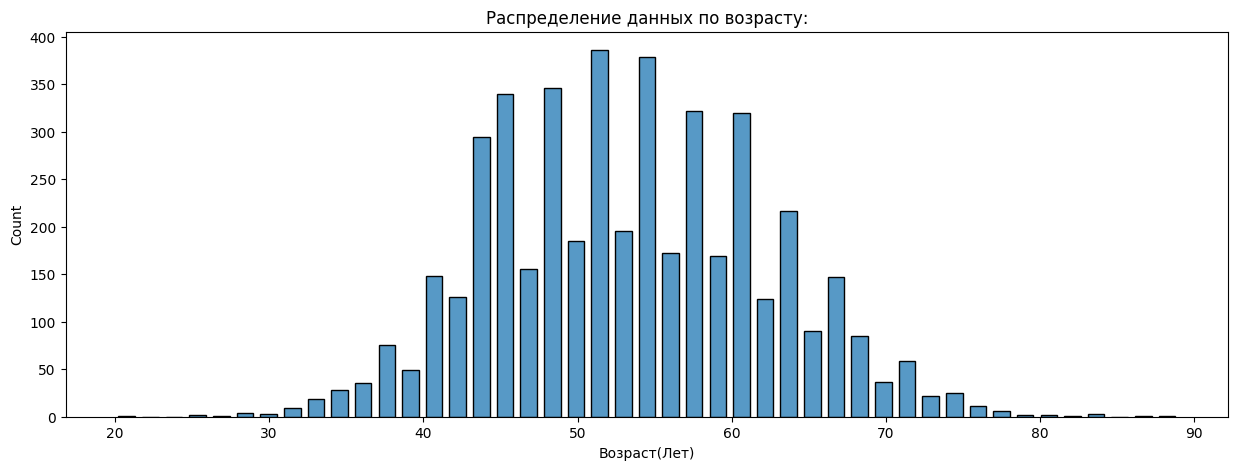

In [ ]:
plt.subplots(figsize=(15, 5))
sns.histplot(data = data, x = 'Возраст(Лет)', multiple = 'dodge', shrink = .7)
plt.title('Распределение данных по возрасту:')
plt.show()

Визуализация представляет собой гистограмму, которая показывает распределение данных по возрасту среди исследуемой аудитории.

По высоте столбцов мы можем определить, сколько наблюдений входит в каждую возрастную категорию. В данном случае, мы видим, что самые частые значения возраста, находится в середине диапазона возрастов. Остальное количество записей снижается, что может указывать на естественное сокращение числа представителей с более младшими или старшими возрастами.

3. Рассмотрим взаимосвязь между возрастом и общим числом беременностей на графике рассеяния с цветовой схемой:

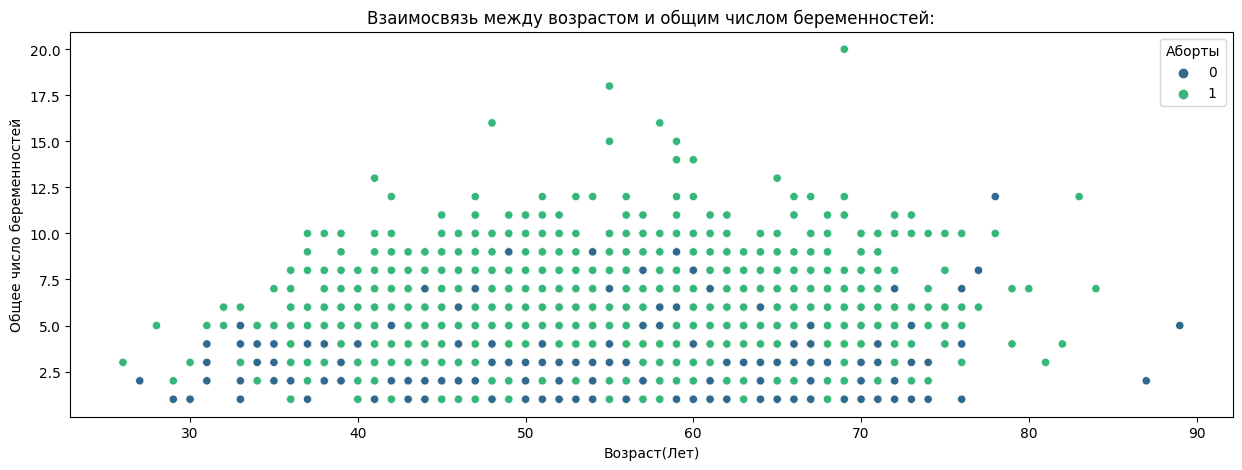

In [ ]:
plt.subplots(figsize=(15, 5))
sns.scatterplot(x = data['Возраст(Лет)'], y = data['Общее число беременностей'], hue = data['Аборты'], palette='viridis')
plt.title('Взаимосвязь между возрастом и общим числом беременностей:')
plt.show()

Точечная диаграмма позволяет нам визуально оценить взаимосвязь между возрастом и общим числом беременностей, а также выявить возможные зависимости с учетом фактора 'Аборты'.

На основе предоставленной визуализации мы можем сделать следующие наблюдения и сформулировать выводы:

Возрастные точки, расположенные слева от 30 на горизонтальной оси, имеют ниже средние значения на вертикальной оси (число беременностей).
Это указывает на тенденцию к меньшему количеству беременностей у женщин до 30 лет.

Точки на графике сосредоточены преимущественно в диапазоне возраста от 35 до 75 лет. В этом диапазоне можно заметить значительное увеличение числа беременностей, что может свидетельствовать о более высокой вероятности беременности в этом возрастном диапазоне.

По мере увеличения возраста после 75 лет, точки становятся менее плотными, это указывает на тенденцию к уменьшению числа беременностей у женщин старше 75 лет.






4. Изучим, как возраст распределен среди различных категорий в столбце 'Менструальные циклы':

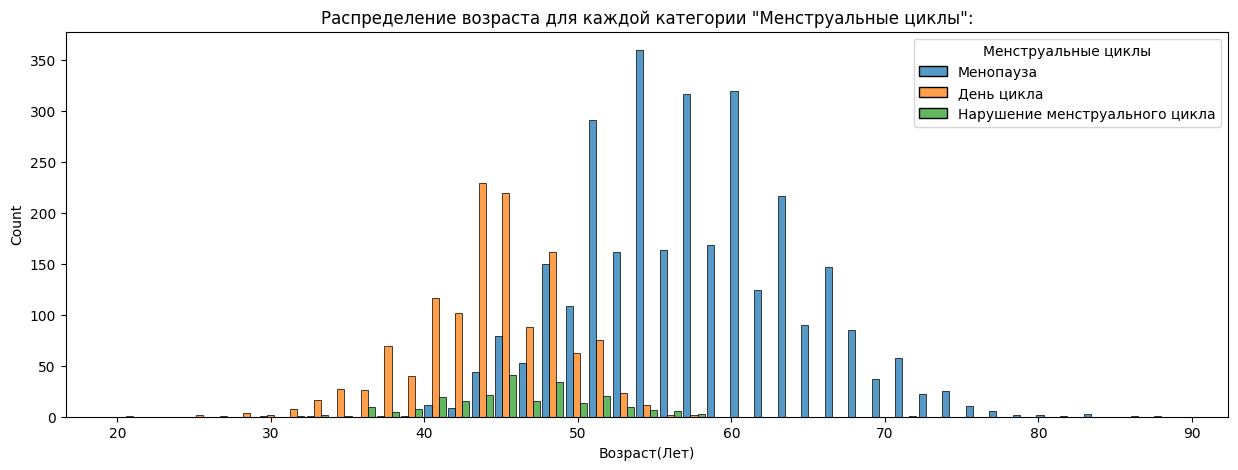

In [ ]:
plt.subplots(figsize=(15, 5))
sns.histplot(data = data, x = 'Возраст(Лет)', hue = 'Менструальные циклы' ,multiple = 'dodge', shrink = .9)
plt.title('Распределение возраста для каждой категории "Менструальные циклы":')
plt.show()

Взглянув на график, мы можем сделать следующие наблюдения:

Гистограмма позволяет сравнивать распределение возраста для каждой категории 'Менструальные циклы'. Каждый столбчатый набор групп представляет определенную категорию, а цветовая группировка указывает на отличия в распределении возраста между этими категориями.

Высота столбцов на графике отображает количество наблюдений (частоту) в каждой возрастной группе. Более высокие столбцы указывают на большее количество наблюдений в этой группе возраста.

**BIRADS (Breast Imaging Reporting and Data System)**

5. Распределим данные по типам BIRADS: benign - доброкачественная, malignant - злокачественная:

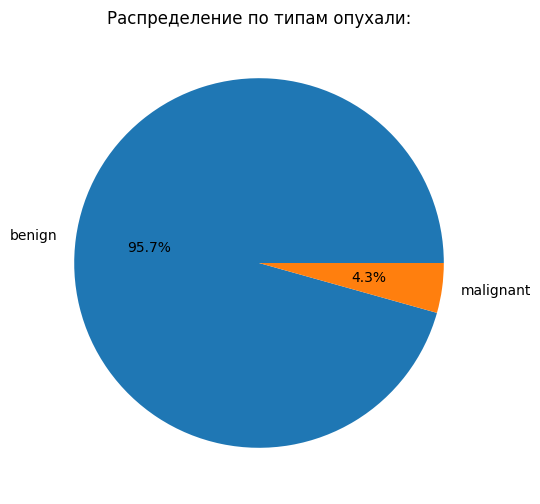

In [ ]:
birads_counts = data['BIRADS(Общее)'].value_counts()

plt.figure(figsize=(8, 6))
birads_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Распределение по типам опухали:')
plt.show()

Круговая диаграмма наглядно демонстрирует распределение данных по двум типам опухолей. Сектор "benign" с наибольшим процентом указывает на наиболее часто встречающийся тип опухоли среди записей. Сектор "malignant" с меньшим процентом представляет тип опухоли, который составляет небольшую часть общего числа записей.

6. Посмотрим зависит ли тип BIRADS от общего числа беременностей:

In [ ]:
fig = px.box(data, x='Общее число беременностей', y='BIRADS(Общее)', color='Наследственность', title = 'Зависимость типа опухоли от общего числа беременностей:')
fig.show()

Ящиковая диаграмма (box plot) позволяет наглядно отобразить статистические характеристики данных и сравнивать распределение значений между различными категориями. Цветовые различия в ящиках указывают на различные значения переменной 'Наследственность'. Каждая категория 'Наследственность' имеет свой цвет.

На данном графике видно, что общее количество беременностей не вляет на тип опухоли у женщин.


7. Рассмотрим тип BIRADS в зависимости от возраста:

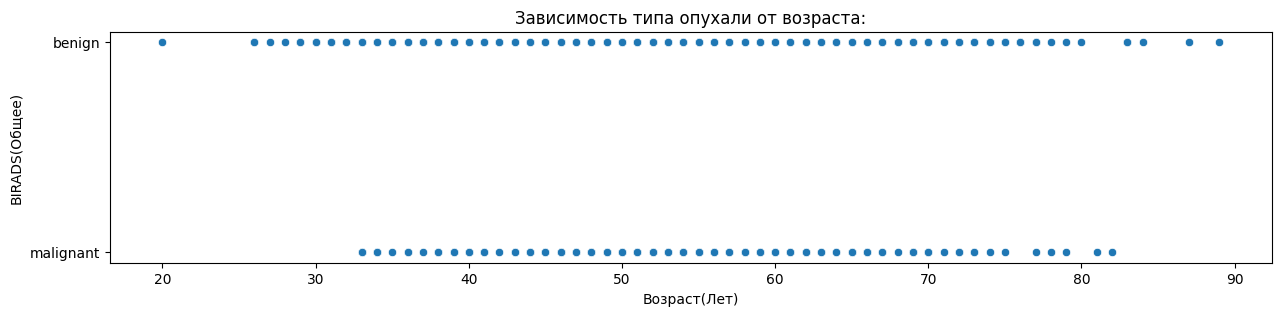

In [ ]:
plt.subplots(figsize=(15, 3))
sns.scatterplot(x = data['Возраст(Лет)'], y = data['BIRADS(Общее)'])
plt.title('Зависимость типа опухали от возраста:')
plt.show()

График позволяет увидеть, как распределены наблюдения по возрасту и типу BIRADS. Мы можем определить, что у женщин в возрасте до 35 лет преобладает тип доброкачественной РМЖ(рак молочной железы).

После 35 лет точки на графике распределены между обоими типами BIRADS (доброкачественными и злокачественными). Это указывает на то, что после 35 лет возраст не вляет на категорию BIRADS, в равном количестве тип доброкачественной и тип злокачественной РМЖ.

8. Рассмотрим тип BIRADS в зависимости от возраста и наследственности:

In [ ]:
fig = px.box(data, x = 'Возраст(Лет)', y = 'BIRADS(Общее)', color = 'Наследственность', title = 'Тип BIRADS в зависимости от возраста и наследственности:')
fig.show()

Цветовые различия в ящиках указывают на различные значения переменной 'Наследственность', что позволяет сравнивать распределение типов BIRADS для каждого значения 'Возраст(Лет)'. Как и на предыдущем графике мы видим, что оба типа BIRADS встречаются одинаково в возрастном диапозоне от 35 до 75 лет. Но мы также можем сделать вывод, что у женщин со злокачественной РМЖ в наследственности наблюдается большее количество случаев, чем у тех, у кого доброкачественная РМЖ.


In [ ]:
data.columns

Index(['№', 'Дата рождение(возраст)', 'Возраст(Лет)', 'Область',
       'Место жительство', 'Наследственность', 'BIRADS правой груди',
       'BIRADS левой груди', 'BIRADS(Общее)', 'Результаты маммографии',
       'Рекомендации', 'Жалобы', 'Семейное положение',
       'Общее число беременностей', 'Число естественных родов',
       'Число родов методом кесарева сечения', 'Аборты',
       'Первые роды в возрасте', 'Общее число случаев рождения живого ребенка',
       'Общее число случаев рождения мертвого ребенка', 'Менструальные циклы',
       'Маммографическое обследование', 'BIRADS_encoded', 'День цикла',
       'Менопауза', 'Нарушение менструального цикла',
       'Результаты маммографии_encoded'],
      dtype='object')

9. Посмотрим на степень линейной взаимосвязи между парами признаков:

In [ ]:
features = ['Возраст(Лет)', 'Наследственность', 'BIRADS_encoded', 'Результаты маммографии_encoded',
                      'Общее число беременностей', 'Число естественных родов',
                      'Число родов методом кесарева сечения', 'Аборты', 'Первые роды в возрасте',
                      'Общее число случаев рождения живого ребенка',
                      'Общее число случаев рождения мертвого ребенка', 'День цикла', 'Менопауза',
                      'Нарушение менструального цикла']

correlation_matrix = data[features].corr(numeric_only=True)
correlation_matrix

,Возраст(Лет),Наследственность,BIRADS_encoded,Результаты маммографии_encoded,Общее число беременностей,Число естественных родов,Число родов методом кесарева сечения,Аборты,Первые роды в возрасте,Общее число случаев рождения живого ребенка,Общее число случаев рождения мертвого ребенка,День цикла,Менопауза,Нарушение менструального цикла
Возраст(Лет),1.000000,0.001927,0.009787,-0.028220,0.090730,0.013543,0.044803,0.038843,0.053324,0.011612,0.105940,-0.630401,0.687815,-0.184736
Наследственность,0.001927,1.000000,0.041238,0.041219,-0.002270,-0.022061,-0.028978,0.023879,0.033485,-0.053682,0.000915,-0.003978,-0.003456,0.015598
BIRADS_encoded,0.009787,0.041238,1.000000,0.836251,-0.000436,-0.011660,-0.021027,-0.000533,0.029596,-0.037409,0.008326,0.002005,-0.010769,0.019040
Результаты маммографии_encoded,-0.028220,0.041219,0.836251,1.000000,-0.019142,-0.017979,-0.050730,0.008158,0.045538,-0.073523,-0.019370,0.037046,-0.038851,0.007484
Общее число беременностей,0.090730,-0.002270,-0.000436,-0.019142,1.000000,0.169065,-0.049831,0.397999,-0.313309,0.553584,0.111173,-0.020502,0.042482,-0.049238
Число естественных родов,0.013543,-0.022061,-0.011660,-0.017979,0.169065,1.000000,-0.017282,-0.006280,-0.094526,0.245226,0.002295,-0.010794,0.004608,0.012069
Число родов методом кесарева сечения,0.044803,-0.028978,-0.021027,-0.050730,-0.049831,-0.017282,1.000000,-0.090465,0.065221,-0.011733,-0.155516,-0.027721,0.030059,-0.006232
Аборты,0.038843,0.023879,-0.000533,0.008158,0.397999,-0.006280,-0.090465,1.000000,-0.116129,0.065490,-0.051682,-0.040902,0.040074,-0.002197
Первые роды в возрасте,0.053324,0.033485,0.029596,0.045538,-0.313309,-0.094526,0.065221,-0.116129,1.000000,-0.343477,0.037071,-0.006742,0.022630,-0.034693
Общее число случаев рождения живого ребенка,0.011612,-0.053682,-0.037409,-0.073523,0.553584,0.245226,-0.011733,0.065490,-0.343477,1.000000,-0.019101,0.013988,-0.021710,0.017927


Данный код вычисляет матрицу корреляции для выбранных признаков (features). В переменной 'features' содержатся названия столбцов, которые являются числовыми и для которых мы хотим посчитать корреляцию. В матрице корреляции мы видим числовые значения, представляющие коэффициенты корреляции между выбранными признаками.

Высокие значения коэффициентов корреляции (близкие к 1 или -1) указывают на сильную линейную зависимость между признаками.

Низкие значения коэффициентов корреляции (близкие к 0) говорят о слабой или отсутствующей линейной связи между признаками.

Корреляция не подразумевает причинно-следственную связь между признаками. Высокая корреляция может указывать на взаимосвязь или совпадение в данных, но не всегда означает, что один признак вызывает изменение другого.

10. Создадим красочную и информативную тепловую карту (heatmap), которая поможет лучше понять взаимосвязи между признаками в наших данных:

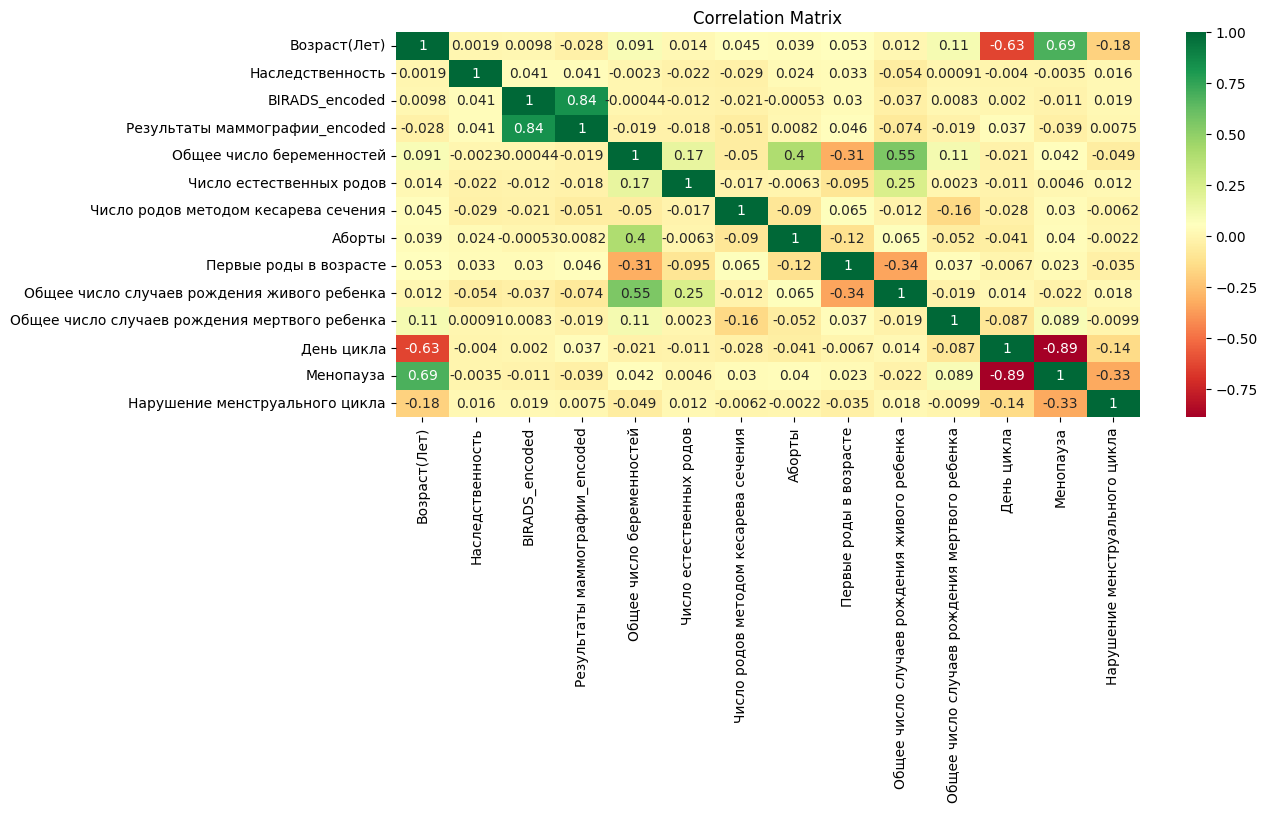

In [ ]:
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

На тепловой карте мы видим матрицу, где каждый элемент содержит значение коэффициента корреляции между соответствующими признаками.

Корреляция близка к 1 (яркий зеленый цвет) указывает на сильную положительную линейную связь между признаками.

Корреляция близка к -1 (яркий красный цвет) указывает на сильную отрицательную линейную связь между признаками.

Корреляция близка к 0 (более бледные цвета) указывает на отсутствие или слабую линейную связь между признаками.

В нашей матрице мы видим сильную положительную связь (0.84) между результатами маммографии и типом BIRADS, это говорит о том, что от результата маммографии зависит тип РМЖ. А также сильная отрицательная связь видна между признаком "Возраст" и "День цикла", из этого можно сделать вывод, что с возрастом у женщин меняется организм, иногда происходят нарушения цикла.

# Построение моделей

Мы будем использовать несколько алгоритмов машинного обучения: *Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier, CatBoostClassifier*.

Чтобы точно понять, какая модель наилучшим образом подойдет для нашей задачи предсказания типа BIRADS, мы будем использовать несколько подходов и методов оценки производительности моделей. Вот описание каждого подхода:

**Без кросс-валидации**: В данном подходе мы разделим данные на обучающую и тестовую выборки. Затем обучим модель на обучающей выборке и оценим ее производительность, используя тестовую выборку. Метрики оценки помогут нам определить, какая модель лучше справляется с предсказанием типа BIRADS на отложенной выборке.

**С кросс-валидацией**: В данном подходе мы применим кросс-валидацию, чтобы получить более стабильные оценки производительности моделей. Данные разделяются на несколько "фолдов", и модель обучается и тестируется на разных комбинациях данных. Это помогает учесть возможные вариации в данных и предоставляет более надежную оценку производительности. Мы будем использовать метрику средний F1-Score для всех фолдов.

**Без кросс-валидации с использованием оптимизации**: В данном подходе мы применим оптимизацию гиперпараметров моделей, используя Optuna. Мы будем выбирать оптимальные значения гиперпараметров, которые максимизируют производительность модели на отложенной выборке.

**С кросс-валидацией с использованием оптимизации**: Этот подход объединяет два предыдущих. Мы применяем кросс-валидацию с использованием оптимизации гиперпараметров. Это позволяет нам оценить производительность моделей с более надежными оценками и выбрать оптимальные параметры для каждой модели.

В результате, мы получим оценки производительности для каждой модели и сможем выбрать наилучшую модель на основе выбранной метрики оценки (F1-Score). Важно провести адекватное сравнение моделей с помощью различных подходов и методов оценки, чтобы принять наилучшее решение для данной задачи.

*Без кросс-валидации:*

Шаг 1: Разделение данных на признаки (X) и целевую переменную (y)

In [ ]:
X = data[['Возраст(Лет)', 'Наследственность', 'Аборты', 'День цикла',
       'Менопауза', 'Нарушение менструального цикла', 'Результаты маммографии_encoded']]
y = data['BIRADS_encoded']

Шаг 2: Разделение данных на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (3678, 7)
X_test:  (920, 7)
y_train:  (3678,)
y_test:  (920,)


Шаг 3: Создание, тренировка и предсказание объектов моделей

Logistic Regression:

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_logreg = logreg_model.predict(X_test)

f1 = f1_score(y_test, y_pred_logreg)
print('F1_score: ', f1)

F1_score:  0.0


Random Forest Classifier:

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc_model.predict(X_test)

f1 = f1_score(y_test, y_pred_rfc)
print('F1_score: ', f1)

F1_score:  0.942528735632184


GradientBoostingClassifier:

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc = gbc_model.predict(X_test)

f1 = f1_score(y_test, y_pred_gbc)
print('F1_score: ', f1)

F1_score:  0.9176470588235294


CatBoostClassifier:

In [ ]:
catbc_model = CatBoostClassifier()
catbc_model.fit(X_train,y_train)

Learning rate set to 0.017966
0:	learn: 0.6417152	total: 32.8ms	remaining: 32.7s
1:	learn: 0.5987421	total: 43.6ms	remaining: 21.7s
2:	learn: 0.5498868	total: 55.9ms	remaining: 18.6s
3:	learn: 0.5139670	total: 68.3ms	remaining: 17s
4:	learn: 0.4713016	total: 82.9ms	remaining: 16.5s
5:	learn: 0.4328768	total: 100ms	remaining: 16.6s
6:	learn: 0.3982855	total: 109ms	remaining: 15.5s
7:	learn: 0.3659234	total: 123ms	remaining: 15.3s
8:	learn: 0.3408176	total: 134ms	remaining: 14.7s
9:	learn: 0.3141589	total: 152ms	remaining: 15.1s
10:	learn: 0.2879818	total: 166ms	remaining: 14.9s
11:	learn: 0.2649005	total: 187ms	remaining: 15.4s
12:	learn: 0.2485551	total: 201ms	remaining: 15.3s
13:	learn: 0.2299711	total: 221ms	remaining: 15.6s
14:	learn: 0.2130534	total: 233ms	remaining: 15.3s
15:	learn: 0.1956044	total: 251ms	remaining: 15.5s
16:	learn: 0.1812467	total: 270ms	remaining: 15.6s
17:	learn: 0.1691932	total: 282ms	remaining: 15.4s
18:	learn: 0.1578152	total: 292ms	remaining: 15.1s
19:	lear

In [ ]:
y_pred_catbc = catbc_model.predict(X_test)

f1 = f1_score(y_test, y_pred_catbc)
print('F1_score: ', f1)

F1_score:  0.9176470588235294


Исходя из результатов без кросс-валидации, можно сделать следующие выводы:

Logistic Regression показала очень низкую производительность с F1-Score равным 0.0. Это означает, что данная модель не смогла правильно предсказать ни одного класса.

Random Forest Classifier показал отличную производительность с F1-Score равным 0.943. Это говорит о том, что модель случайного леса очень хорошо справляется с задачей классификации и способна делать точные предсказания.

Gradient Boosting Classifier также показала хороший результат с F1-Score равным 0.918. Градиентный бустинг обладает хорошей способностью к обобщению и высокой точностью предсказаний.

Cat Boost Classifier также продемонстрировал хороший результат с F1-Score равным 0.918, что делает его сравнимым с градиентным бустингом. CatBoost обрабатывает категориальные признаки автоматически, что упрощает процесс подготовки данных.

Итог: Без кросс-валидации, случайный лес показывает лучшие результаты по сравнению с другими моделями. Однако, чтобы более точно определить, какая модель является лучшей, рекомендуется провести кросс-валидацию для оценки производительности каждой модели.

*С кросс валидацией:*

Шаг 1: Разделение данных на признаки (X) и целевую переменную (y)

In [ ]:
X = data[['Возраст(Лет)', 'Наследственность', 'Аборты', 'День цикла',
       'Менопауза', 'Нарушение менструального цикла', 'Результаты маммографии_encoded']]
y = data['BIRADS_encoded']

Шаг 2: Создаем разбиения на кросс-валидацию с 5 фолдами и оцениваем производительность моделей на всех фолдах.

Logistic Regression:

In [ ]:
logreg_model = LogisticRegression(max_iter=1000, random_state = 2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
logreg_scores = cross_val_score(logreg_model, X, y, cv=kf, scoring='f1')

print('Mean F1-Score:', logreg_scores.mean())
print('Individual Fold F1-Scores:', logreg_scores)

Mean F1-Score: 0.0
Individual Fold F1-Scores: [0. 0. 0. 0. 0.]


Random Forest Classifier:

In [ ]:
rfc_model = RandomForestClassifier(random_state = 2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rfc_scores = cross_val_score(rfc_model, X, y, cv=kf, scoring='f1')

print('Mean F1-Score:', rfc_scores.mean())
print('Individual Fold F1-Scores:', rfc_scores)

Mean F1-Score: 0.9160253493448343
Individual Fold F1-Scores: [0.94252874 0.92857143 0.89156627 0.88888889 0.92857143]


Gradient Boosting Classifier:

In [ ]:
gbc_model = GradientBoostingClassifier(random_state = 2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gbc_scores = cross_val_score(gbc_model, X, y, cv=kf, scoring='f1')

print('Mean F1-Score:', gbc_scores.mean())
print('Individual Fold F1-Scores:', gbc_scores)

Mean F1-Score: 0.9151652621312166
Individual Fold F1-Scores: [0.91764706 0.95238095 0.91358025 0.85245902 0.93975904]


Cat Boost Classifier:

In [ ]:
catbc_model = CatBoostClassifier(random_state = 2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
catbc_scores = cross_val_score(catbc_model, X, y, cv=kf, scoring='f1')

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4640200	total: 37.4ms	remaining: 7.44s
5:	learn: 0.4257944	total: 41.7ms	remaining: 6.9s
6:	learn: 0.3943157	total: 45.5ms	remaining: 6.45s
7:	learn: 0.3634365	total: 51.4ms	remaining: 6.38s
8:	learn: 0.3402634	total: 53.6ms	remaining: 5.9s
9:	learn: 0.3173379	total: 57.4ms	remaining: 5.68s
10:	learn: 0.2894758	total: 61.2ms	remaining: 5.51s
11:	learn: 0.2701400	total: 65.3ms	remaining: 5.38s
12:	learn: 0.2529526	total: 69.4ms	remaining: 5.27s
13:	learn: 0.2308220	total: 73.6ms	remaining: 5.18s
14:	learn: 0.2153640	total: 77.4ms	remaining: 5.08s
15:	learn: 0.2002016	total: 86.2ms	remaining: 5.3s
16:	learn: 0.1885091	total: 90.1ms	remaining: 5.21s
17:	learn: 0.1747876	total: 94ms	remaining: 5.13s
18:	learn: 0.1636741	total: 97.7ms	remaining: 5.04s
19:	learn: 0.1517037	total: 104ms	remaining: 5.11s
20:	learn: 0.1439494	total: 108ms	remaining: 5.04s
21:	learn: 0.1343908	total: 112ms	remaining: 4.96s
22:	learn: 0.1274477	total:

In [ ]:
print('Mean F1-Score:', catbc_scores.mean())
print('Individual Fold F1-Scores:', catbc_scores)

Mean F1-Score: 0.9039324116743472
Individual Fold F1-Scores: [0.91764706 0.94117647 0.88095238 0.83870968 0.94117647]


По результатам кросс-валидации для различных моделей, мы получили следующие средние значения F1-Score:

Логистическая регрессия: Mean F1-Score: 0.0

Random Forest Classifier: Mean F1-Score: 0.9160253493448343

Gradient Boosting Classifier: Mean F1-Score: 0.9151652621312166

Cat Boost Classifier: Mean F1-Score: 0.9039324116743472

Вывод:

Логистическая регрессия показала очень низкое среднее значение F1-Score, равное 0.0. Это может указывать на то, что данная модель не смогла хорошо обучиться и правильно классифицировать примеры. Возможно, для данной задачи логистическая регрессия не является подходящим алгоритмом или требуется дополнительная настройка параметров.

Случайный лес и Градиентный бустинг показали сравнимо высокие средние значения F1-Score, примерно равные 0.92. Это говорит о том, что обе модели хорошо справляются с задачей классификации и предсказывают тип BIRADS с высокой точностью. Оба алгоритма могут быть рассмотрены как перспективные варианты для этой задачи.

CatBoost также продемонстрировал хорошую производительность со средним значением F1-Score около 0.90. Это свидетельствует о том, что CatBoost также является хорошим алгоритмом для классификации типа BIRADS и может быть рассмотрен в качестве альтернативы другим моделям.

*Без кросс-валидации с использованием оптимизации:*

Шаг 1: Разделение данных на признаки (X) и целевую переменную (y)

In [ ]:
X = data[['Возраст(Лет)', 'Наследственность', 'Аборты', 'День цикла',
       'Менопауза', 'Нарушение менструального цикла', 'Результаты маммографии_encoded']]
y = data['BIRADS_encoded']

Шаг 2: Разделение данных на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (3678, 7)
X_test:  (920, 7)
y_train:  (3678,)
y_test:  (920,)


Шаг 3: Подбор параметров, тренировка и предсказание для каждой модели

Logistic Regression:

In [ ]:
def objective(trial):
    params = {
        'penalty' : trial.suggest_categorical('penalty', ['l1', 'l2']),
        'C': trial.suggest_loguniform('C', 0.1, 1),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'random_state': 2
    }

    logreg_model = LogisticRegression(**params, verbose=False, solver='liblinear')
    logreg_model.fit(X_train, y_train)

    y_pred_logreg = logreg_model.predict(X_test)
    f1 = f1_score(y_test, y_pred_logreg)

    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_f1 = study.best_value

[I 2023-07-21 06:16:29,888] A new study created in memory with name: no-name-cfc6e2c0-f8c2-4700-bc97-d62a50e673f4
<ipython-input-142-9b85c25e34ac>:4: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2023-07-21 06:16:29,914] Trial 0 finished with value: 0.0 and parameters: {'penalty': 'l2', 'C': 0.505672660792447, 'max_iter': 513}. Best is trial 0 with value: 0.0.
<ipython-input-142-9b85c25e34ac>:4: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2023-07-21 06:16:29,941] Trial 1 finished with value: 0.9761904761904763 and parameters: {'penalty': 'l1', 'C': 0.2024039299616781, 'max_iter': 196}. Best is trial 1 with value: 0.9761904761904763.
<ipython-input-142-9b85c25e34

In [ ]:
print('Best Params:', best_params)
print('Best F1:', best_f1)

Best Params: {'penalty': 'l1', 'C': 0.2024039299616781, 'max_iter': 196}
Best F1: 0.9761904761904763


Random Forest Classifier:

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 400),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'random_state': 2
    }

    rfc_model = RandomForestClassifier(**params, verbose=False)
    rfc_model.fit(X_train, y_train)

    y_pred_rfc = rfc_model.predict(X_test)
    f1 = f1_score(y_test, y_pred_rfc)

    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_f1 = study.best_value

[I 2023-07-21 06:17:01,702] A new study created in memory with name: no-name-3338be91-cee1-402b-a444-def6035e74dc
[I 2023-07-21 06:17:02,341] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 309, 'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.0.
[I 2023-07-21 06:17:02,709] Trial 1 finished with value: 0.942528735632184 and parameters: {'n_estimators': 134, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.942528735632184.
[I 2023-07-21 06:17:03,971] Trial 2 finished with value: 0.9647058823529412 and parameters: {'n_estimators': 275, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.9647058823529412.
[I 2023-07-21 06:17:04,628] Trial 3 finished with value: 0.942528735632184 and parameters: {'n_estimators': 151, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9647058823529412.
[I 2023-07-21 

In [ ]:
print('Best Params:', best_params)
print('Best F1:', best_f1)

Best Params: {'n_estimators': 18, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 7}
Best F1: 0.9761904761904763


Gradient Boosting Classifier:

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'random_state': 2
    }

    gbc_model = GradientBoostingClassifier(**params, verbose=False)
    gbc_model.fit(X_train, y_train)

    y_pred_gbc = gbc_model.predict(X_test)
    f1 = f1_score(y_test, y_pred_gbc)

    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_f1 = study.best_value

Streaming output truncated to the last 5000 lines.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprec

In [ ]:
print('Best Params:', best_params)
print('Best F1:', best_f1)

Best Params: {'n_estimators': 188, 'learning_rate': 0.007171978647042725, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 10, 'subsample': 0.5481244446213769, 'max_features': 'auto'}
Best F1: 0.9761904761904763


Cat Boost Classifier:

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'random_strength': trial.suggest_int('random_strength', 1, 10),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'random_state': 2
    }

    model_catbc = CatBoostClassifier(**params, verbose=False)
    model_catbc.fit(X_train, y_train)

    y_pred_catbc = model_catbc.predict(X_test)
    f1 = f1_score(y_test, y_pred_catbc)

    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_f1 = study.best_value

[I 2023-07-21 06:22:48,908] A new study created in memory with name: no-name-0ae0e910-501f-4e3c-881a-329a2edfd1a0
<ipython-input-151-e46c2006be58>:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-151-e46c2006be58>:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2023-07-21 06:22:49,674] Trial 0 finished with value: 0.9534883720930233 and parameters: {'iterations': 536, 'depth': 4, 'learning_rate': 0.0024041694349992773, 'random_strength': 3, 'bagging_temperature': 0.12665640774953635, 'border_count': 139}. Best is trial 0 with value: 0.9534883720930233.
<ipython-input-151-e46c2006be58>:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0

In [ ]:
print('Best Params:', best_params)
print('Best F1:', best_f1)

Best Params: {'iterations': 108, 'depth': 7, 'learning_rate': 0.001629581056117214, 'random_strength': 6, 'bagging_temperature': 2.523452173324185, 'border_count': 54}
Best F1: 0.9647058823529412


На основании предоставленных результатов без кросс-валидации с использованием Optuna для каждой модели, можно сделать следующие выводы:

Логистическая регрессия, Random Forest Classifier и Gradient Boosting Classifier показали одинаково высокое значение метрики F1, равное 0.976. Это означает, что все три модели достигли отличных результатов на тестовой выборке без использования кросс-валидации, и они хорошо справились с предсказанием типа BIRADS.

Модель Cat Boost Classifier также показала хороший результат с метрикой F1 равной 0.965. Она немного уступила другим моделям, но все равно имеет хорошую производительность.

Важно отметить, что результаты без кросс-валидации могут быть подвержены переобучению, так как модели могут быть настроены на конкретные особенности обучающего набора данных. Поэтому, чтобы получить более объективную оценку производительности моделей, рекомендуется использовать кросс-валидацию.

Для более точного сравнения моделей и выбора наилучшей модели, рекомендуется выполнить оптимизацию с использованием кросс-валидации для каждой модели. Это поможет оценить, как хорошо модели обобщаются на новых данных и устойчивы к вариативности данных.



*С кросс-валидацией и использованием уже подобранных гиперпараметров:*

Шаг 1: Разделение данных на признаки (X) и целевую переменную (y)

In [ ]:
X = data[['Возраст(Лет)', 'Наследственность', 'Аборты', 'День цикла',
       'Менопауза', 'Нарушение менструального цикла', 'Результаты маммографии_encoded']]
y = data['BIRADS_encoded']

Шаг 2. Создаем разбиения на кросс-валидацию с 5 фолдами и оцениваем производительность моделей на всех фолдах.

Logistic Regression:

In [ ]:
logreg_model = LogisticRegression(penalty = 'l1', C = 0.2024039299616781, max_iter = 196, solver='liblinear', random_state = 2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
logreg_scores = cross_val_score(logreg_model, X, y, cv=kf, scoring='f1')

print('Mean F1-Score:', logreg_scores.mean())
print('Individual Fold F1-Scores:', logreg_scores)

Mean F1-Score: 0.9258946553412553
Individual Fold F1-Scores: [0.97619048 0.90909091 0.92307692 0.88135593 0.93975904]


Random Forest Classifier:

In [ ]:
rfc_model = RandomForestClassifier(random_state = 2, n_estimators = 18, max_depth = 3, min_samples_split = 8, min_samples_leaf = 7)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rfc_scores = cross_val_score(rfc_model, X, y, cv=kf, scoring='f1')

print('Mean F1-Score:', rfc_scores.mean())
print('Individual Fold F1-Scores:', rfc_scores)

Mean F1-Score: 0.9272348202802411
Individual Fold F1-Scores: [0.93181818 0.93670886 0.95       0.9        0.91764706]


Gradient Boosting Classifier:

In [ ]:
gbc_model = GradientBoostingClassifier(random_state = 2, n_estimators = 188, learning_rate = 0.007171978647042725, max_depth = 9,
                                       min_samples_split = 6, min_samples_leaf = 10, subsample = 0.5481244446213769, max_features = 'auto')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gbc_scores = cross_val_score(gbc_model, X, y, cv=kf, scoring='f1')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`m

In [ ]:
print('Mean F1-Score:', gbc_scores.mean())
print('Individual Fold F1-Scores:', gbc_scores)

Mean F1-Score: 0.9255253351123519
Individual Fold F1-Scores: [0.95238095 0.93670886 0.93670886 0.86206897 0.93975904]


Cat Boost Classifier:

In [ ]:
catbc_model = CatBoostClassifier(random_state = 2, iterations = 108, depth = 7, learning_rate = 0.001629581056117214,
                                 random_strength = 6, bagging_temperature = 2.523452173324185, border_count = 54)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
catbc_scores = cross_val_score(catbc_model, X, y, cv=kf, scoring='f1')

0:	learn: 0.6918600	total: 1.26ms	remaining: 135ms
1:	learn: 0.6903427	total: 3.18ms	remaining: 169ms
2:	learn: 0.6887854	total: 3.82ms	remaining: 134ms
3:	learn: 0.6873393	total: 5.15ms	remaining: 134ms
4:	learn: 0.6858103	total: 6.44ms	remaining: 133ms
5:	learn: 0.6843226	total: 7.89ms	remaining: 134ms
6:	learn: 0.6828289	total: 9.22ms	remaining: 133ms
7:	learn: 0.6815053	total: 10.2ms	remaining: 127ms
8:	learn: 0.6800007	total: 11.4ms	remaining: 125ms
9:	learn: 0.6784848	total: 12.3ms	remaining: 121ms
10:	learn: 0.6769915	total: 13.5ms	remaining: 119ms
11:	learn: 0.6755130	total: 14.7ms	remaining: 118ms
12:	learn: 0.6740784	total: 15.7ms	remaining: 115ms
13:	learn: 0.6725826	total: 16.4ms	remaining: 110ms
14:	learn: 0.6710829	total: 17.3ms	remaining: 107ms
15:	learn: 0.6696136	total: 18.5ms	remaining: 106ms
16:	learn: 0.6681913	total: 19.7ms	remaining: 105ms
17:	learn: 0.6667633	total: 20.9ms	remaining: 104ms
18:	learn: 0.6652946	total: 22.1ms	remaining: 103ms
19:	learn: 0.6638329	t

In [ ]:
print('Mean F1-Score:', catbc_scores.mean())
print('Individual Fold F1-Scores:', catbc_scores)

Mean F1-Score: 0.9388799171417253
Individual Fold F1-Scores: [0.96470588 0.93670886 0.95       0.90322581 0.93975904]


На основе предоставленных результатов с использованием кросс-валидации и использование уже подобранных гиперпараметров с помощью Optuna для каждой модели, можно сделать следующие выводы:

Модель Cat Boost Classifier показала самый высокий результат по метрике F1, равный 0.939. Это означает, что Cat Boost Classifier с оптимальными параметрами из Optuna лучше всего справляется с предсказанием типа BIRADS на кросс-валидации среди всех рассмотренных моделей.

Модели логистической регрессии, Random Forest Classifier и Gradient Boosting Classifier также показали хорошие результаты, с метриками F1 около 0.926-0.928.

Все четыре модели продемонстрировали хорошие показатели, и все они имеют высокую способность к предсказанию типа BIRADS на кросс-валидации.

Итог: запуск моделей с кросс-валидацией и оптимизацией гиперпараметров позволяет получить более объективную оценку производительности и выбрать наилучшую модель для нашей задачи.